In [20]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
from pylab import rcParams
import matplotlib

# configuration
# resolution = "0p1"
resolution = "500"
region = [-180,180,-60,90]
data_path = f'/tera11/zhwei/students/Xionghui/data/run/{resolution}/'
post_data_path = '/tera11/zhwei/students/Xionghui/data/'
shp_path = '/tera11/zhwei/students/Xionghui/data/Shp/'
fig_path = f'/home/xuxh22/stu01/Bedrock/fig/{resolution}/'
path = '/home/xuxh22/stu01/Bedrock/'
if resolution == "0p1":
    size = 0.1
elif resolution == "500":
    size = 0.0005

pd.set_option('display.max_columns', None)
font = {'family': 'Times New Roman'}
matplotlib.rc('font', **font)

params = {'backend': 'ps',
          'axes.labelsize': 25,
          'grid.linewidth': 0.2,
          'font.size': 25,
          'legend.fontsize': 18,
          'legend.frameon': False,
          'xtick.labelsize': 30,
          'xtick.direction': 'out',
          'ytick.labelsize': 30,
          'ytick.direction': 'out',
          'legend.handlelength': 1,
          'legend.handleheight': 1,
          'savefig.bbox': 'tight',
          'axes.unicode_minus': False,
          "mathtext.default":"regular",
          'text.usetex': False}
rcParams.update(params)

In [21]:
df = pd.read_csv(f'{data_path}csv/Global_index.csv')
df

,Unnamed: 0,lat,lon,Sbedrock,Dbedrock_Frequency,Area,P/Sbedrock_div_Sr,P/Sbedrock_div_ET_mean,P/Sbedrock_div_PR_mean,P/ET_mean_div_PR_mean,P/ET_mean_sub_Sbedrock_div_PR_mean,P/Q_mean_div_PR_mean,P/PET_div_PR_mean
0,709889414,-55.764582,-67.439577,7.599648,2.0,120773.879698,21.041584,1.562866,0.745169,47.679657,46.934486,52.320343,52.082520
1,709889415,-55.764582,-67.435411,6.355454,2.0,120773.879698,17.660896,1.309530,0.623964,47.647930,47.023968,52.352070,51.997375
2,709889416,-55.764582,-67.431244,5.111259,2.0,120773.879698,14.255456,1.055210,0.502450,47.616127,47.113678,52.383877,52.677933
3,709975814,-55.760415,-67.439577,7.970362,2.0,120786.785891,21.041586,1.562866,0.772429,49.423893,48.651463,50.576107,48.822857
4,709975815,-55.760415,-67.435411,6.665475,2.0,120786.785891,17.660898,1.309530,0.646655,49.380722,48.734066,50.619278,48.762320
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115910920,3586500782,82.960426,-26.739575,39.297733,1.0,26309.225697,100.000000,36.635372,31.394192,85.693665,54.299473,14.306337,140.854780
115910921,3586500783,82.960426,-26.735409,39.880870,1.0,26309.225697,100.000000,37.097347,31.845638,85.843440,53.997800,14.156559,140.791470
115910922,3586500784,82.960426,-26.731242,40.464010,1.0,26309.225697,100.000000,37.557297,32.296680,85.993090,53.696407,14.006911,140.827160
115910923,3586500785,82.960426,-26.727075,41.047146,1.0,26309.225697,100.000000,38.015236,32.747310,86.142590,53.395283,13.857405,140.912660


In [22]:
df = df[df['Sbedrock'] > 0]

print(df["P/Sbedrock_div_Sr"].mean())
print(df["P/Sbedrock_div_ET_mean"].mean())
print(df["P/Sbedrock_div_PR_mean"].mean())
print(df["P/ET_mean_div_PR_mean"].mean())
print(df["P/ET_mean_sub_Sbedrock_div_PR_mean"].mean())
print(df["P/Q_mean_div_PR_mean"].mean())
print(df["P/PET_div_PR_mean"].mean())

46.22341450197323
15.253050790313752
11.121140011595708
70.65122756140212
59.53008754975872
29.348772438591553
151.3664289220807


In [23]:
df['Dbedrock_Frequency'] = df['Dbedrock_Frequency'].astype('int64')
n1 = len(df[df['Dbedrock_Frequency']==1])
n2 = len(df[df['Dbedrock_Frequency']==2])
n3 = len(df[df['Dbedrock_Frequency']==3])
print(n1,n2,n3)
n = [n1,n2,n3]

df['Dbedrock_Frequency'] = df['Dbedrock_Frequency'].astype(str)
df = df[df['Dbedrock_Frequency'] != '4']

df
# print(df['Dbedrock_Frequency'].describe())

size1 = 30
size2 = 24

df['Dbedrock_Frequency'] = pd.Categorical(df['Dbedrock_Frequency'], categories=["1", "2", "3"], ordered=True)

28690309 83859234 3351582


/tmp/ipykernel_2497881/318434913.py:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.


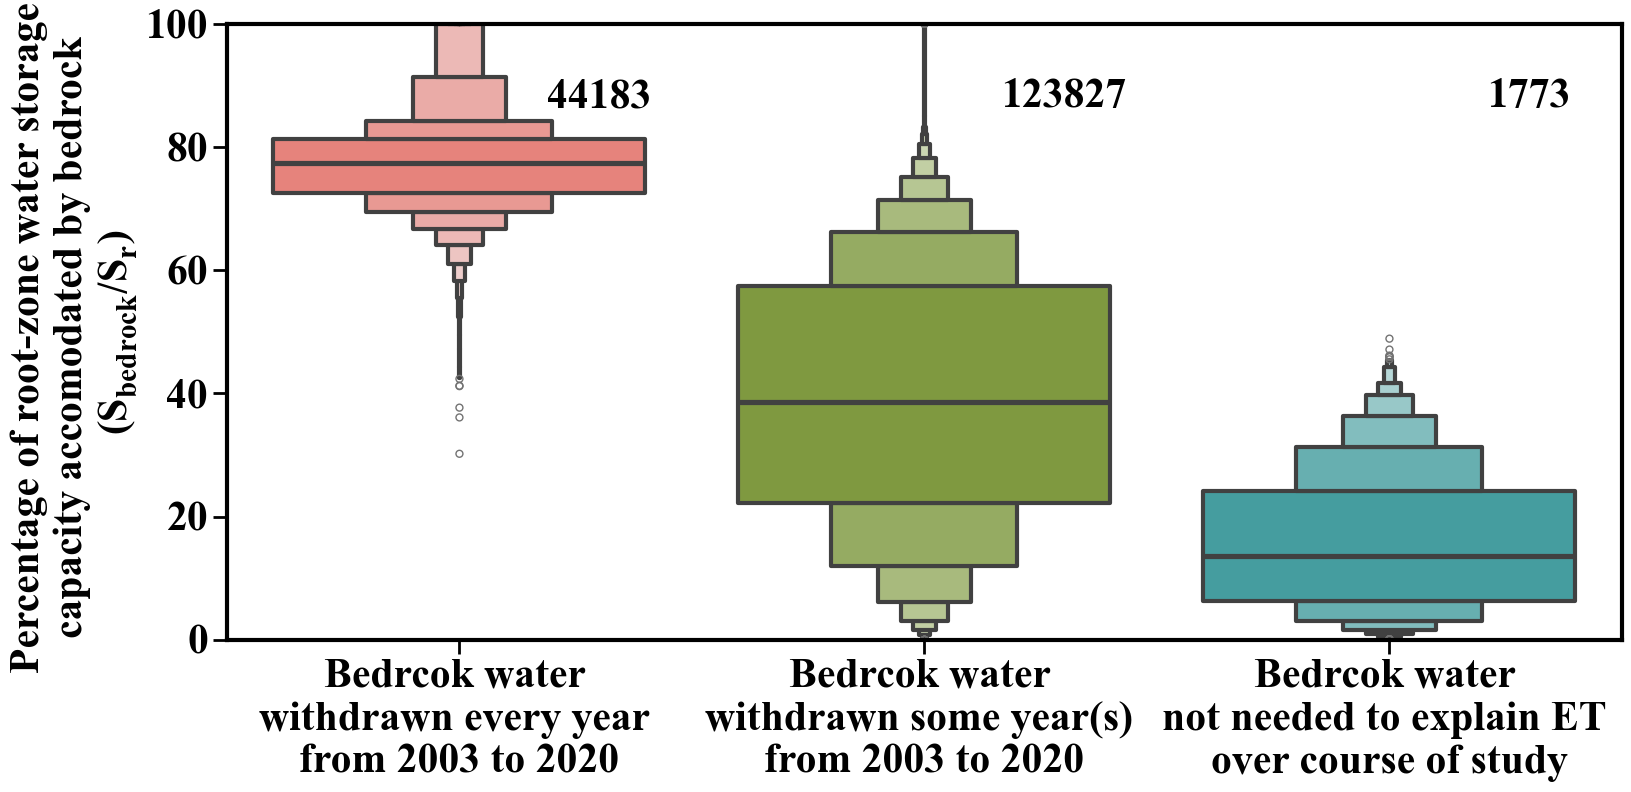

In [13]:
fig = plt.figure(figsize=(18, 8))
sns.boxenplot(x="Dbedrock_Frequency", y="P/Sbedrock_div_Sr", data=df, linewidth=3,
              hue='Dbedrock_Frequency',palette=sns.husl_palette(4, s=0.90, l=0.65, h=0.0417))
                
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(3)  

for i, label in enumerate(ax.get_xticklabels()):
    x_pos = label.get_position()[0]
    ax.text(x_pos+0.3, 85, f'{n[i]}', ha='center', va='bottom', fontsize=size1, fontweight='bold', color='black')

plt.ylim(0, 100)


plt.xlabel('')  
plt.ylabel("Percentage of root-zone water storage \ncapacity accomodated by bedrock \n($S_{bedrock}$/$S_{r}$)", fontsize=size1, fontweight='bold')  

current_ticks = [0,1,2]

new_labels = ['Bedrcok water \nwithdrawn every year \nfrom 2003 to 2020', 
                        'Bedrcok water \nwithdrawn some year(s) \nfrom 2003 to 2020', 
                        'Bedrcok water \nnot needed to explain ET \nover course of study']

plt.xticks(ticks=current_ticks, labels=new_labels, fontsize=size1, fontweight='bold')

yticks = np.arange(0, 120, 20)
plt.yticks(ticks=yticks, labels=yticks,fontsize=size1, fontweight='bold')
plt.show()
# fig.savefig('boxenplot2.pdf')

/tmp/ipykernel_2497881/3830386457.py:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.


([<matplotlib.axis.YTick at 0x1469fcf0b3a0>,
 [Text(0, 0, '0'),
  Text(0, 20, '20'),
  Text(0, 40, '40'),
  Text(0, 60, '60'),
  Text(0, 80, '80'),
  Text(0, 100, '100')])

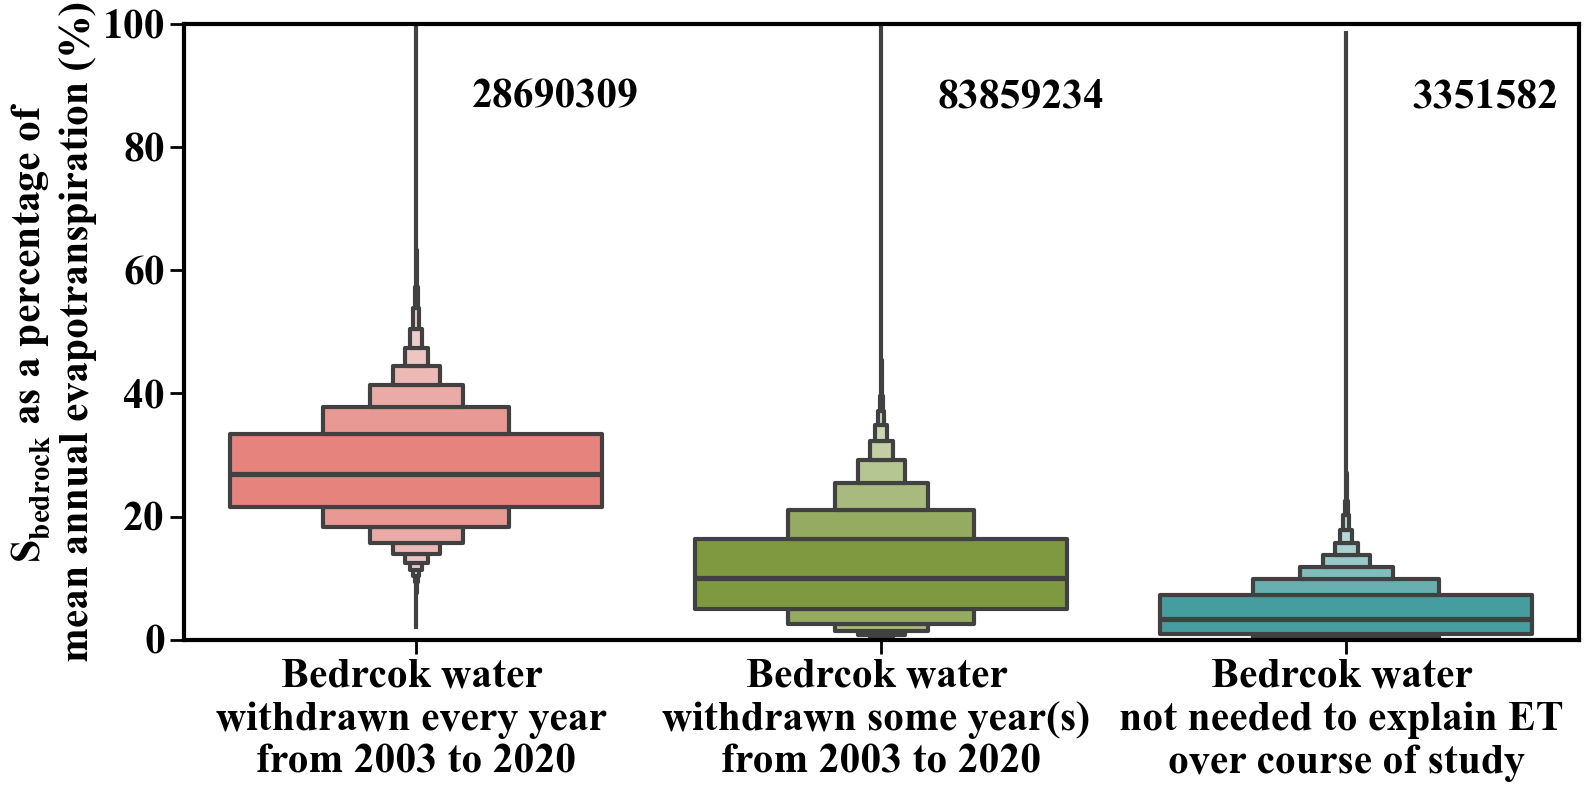

In [24]:
fig = plt.figure(figsize=(18, 8))
sns.boxenplot(x="Dbedrock_Frequency", y="P/Sbedrock_div_ET_mean", data=df, linewidth=3,
              hue='Dbedrock_Frequency',palette=sns.husl_palette(4, s=0.90, l=0.65, h=0.0417),
              outlier_prop=0.0078125, showfliers=False)
                
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(3)  

for i, label in enumerate(ax.get_xticklabels()):
    x_pos = label.get_position()[0]
    ax.text(x_pos+0.3, 85, f'{n[i]}', ha='center', va='bottom', fontsize=size1, fontweight='bold', color='black')

plt.ylim(0, 100)


plt.xlabel('')  
plt.ylabel("$S_{{bedrock}}$ as a percentage of \nmean annual evapotranspiration (%)", fontsize=size1, fontweight='bold')  

current_ticks = [0,1,2]

new_labels = ['Bedrcok water \nwithdrawn every year \nfrom 2003 to 2020', 
                        'Bedrcok water \nwithdrawn some year(s) \nfrom 2003 to 2020', 
                        'Bedrcok water \nnot needed to explain ET \nover course of study']

plt.xticks(ticks=current_ticks, labels=new_labels, fontsize=size1, fontweight='bold')

yticks =np.linspace(0,100,6).astype('int64')
plt.yticks(ticks=yticks,labels=yticks,fontsize=size1, fontweight='bold')

/tmp/ipykernel_2497881/2668076318.py:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.


([<matplotlib.axis.YTick at 0x1469fcee0f10>,
 [Text(0, 0, '0'),
  Text(0, 20, '20'),
  Text(0, 40, '40'),
  Text(0, 60, '60'),
  Text(0, 80, '80'),
  Text(0, 100, '100')])

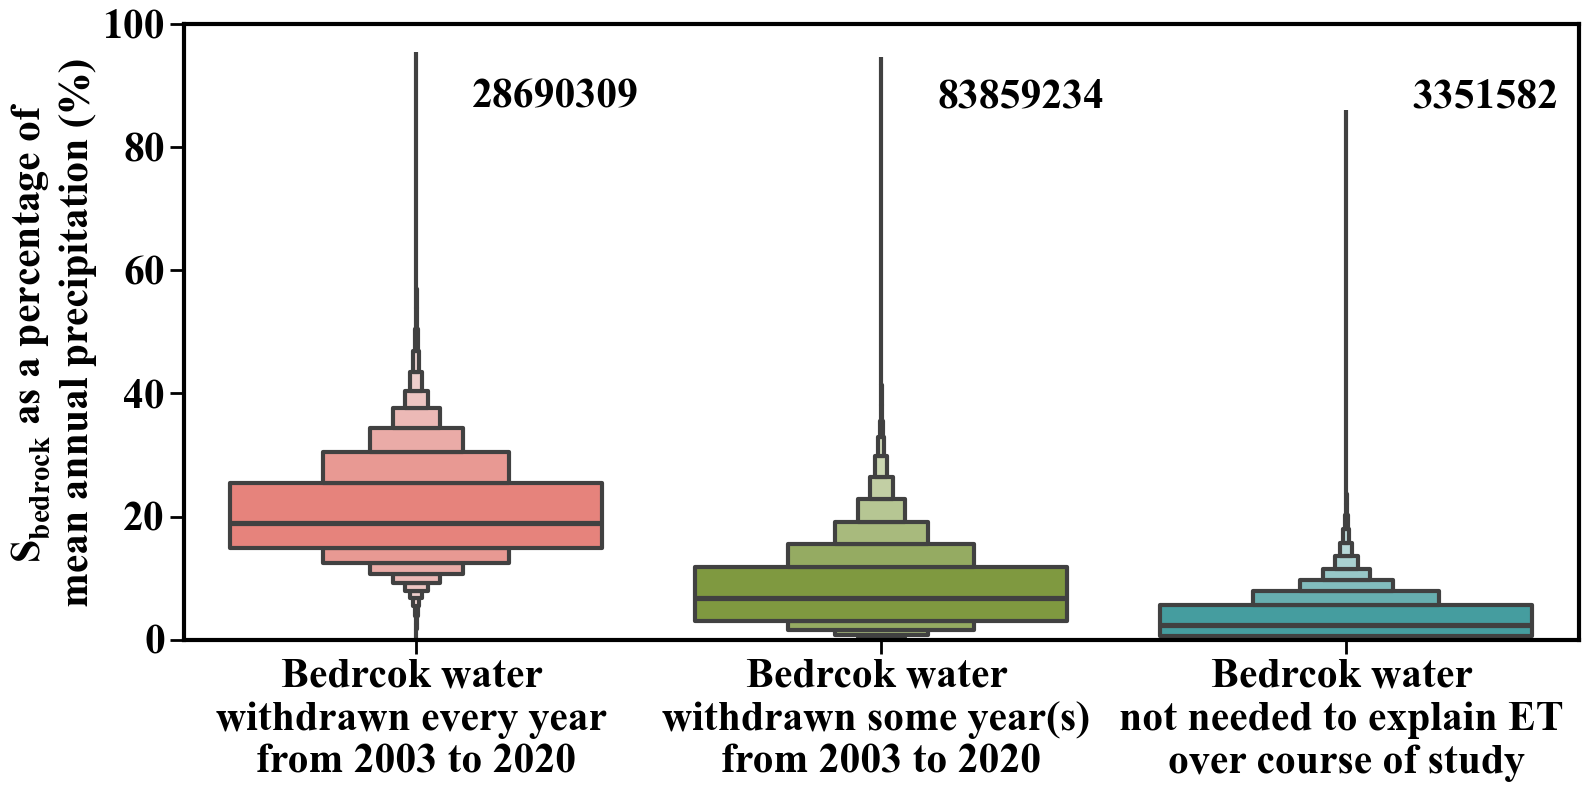

In [25]:
fig = plt.figure(figsize=(18, 8))
sns.boxenplot(x="Dbedrock_Frequency", y="P/Sbedrock_div_PR_mean", data=df, linewidth=3,
              hue='Dbedrock_Frequency',palette=sns.husl_palette(4, s=0.90, l=0.65, h=0.0417),
              outlier_prop=0.0078125, showfliers=False)
                
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(3)  

for i, label in enumerate(ax.get_xticklabels()):
    x_pos = label.get_position()[0]
    ax.text(x_pos+0.3, 85, f'{n[i]}', ha='center', va='bottom', fontsize=size1, fontweight='bold', color='black')

plt.ylim(0, 100)


plt.xlabel('')  
plt.ylabel("$S_{{bedrock}}$ as a percentage of \nmean annual precipitation (%)", fontsize=size1, fontweight='bold')  

current_ticks = [0,1,2]

new_labels = ['Bedrcok water \nwithdrawn every year \nfrom 2003 to 2020', 
                        'Bedrcok water \nwithdrawn some year(s) \nfrom 2003 to 2020', 
                        'Bedrcok water \nnot needed to explain ET \nover course of study']

plt.xticks(ticks=current_ticks, labels=new_labels, fontsize=size1, fontweight='bold')

yticks =np.linspace(0,100,6).astype('int64')
plt.yticks(ticks=yticks,labels=yticks,fontsize=size1, fontweight='bold')

/tmp/ipykernel_3217072/885527804.py:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.


([<matplotlib.axis.YTick at 0x1478036915a0>,
 [Text(0, 0, '0'),
  Text(0, 20, '20'),
  Text(0, 40, '40'),
  Text(0, 60, '60'),
  Text(0, 80, '80'),
  Text(0, 100, '100')])

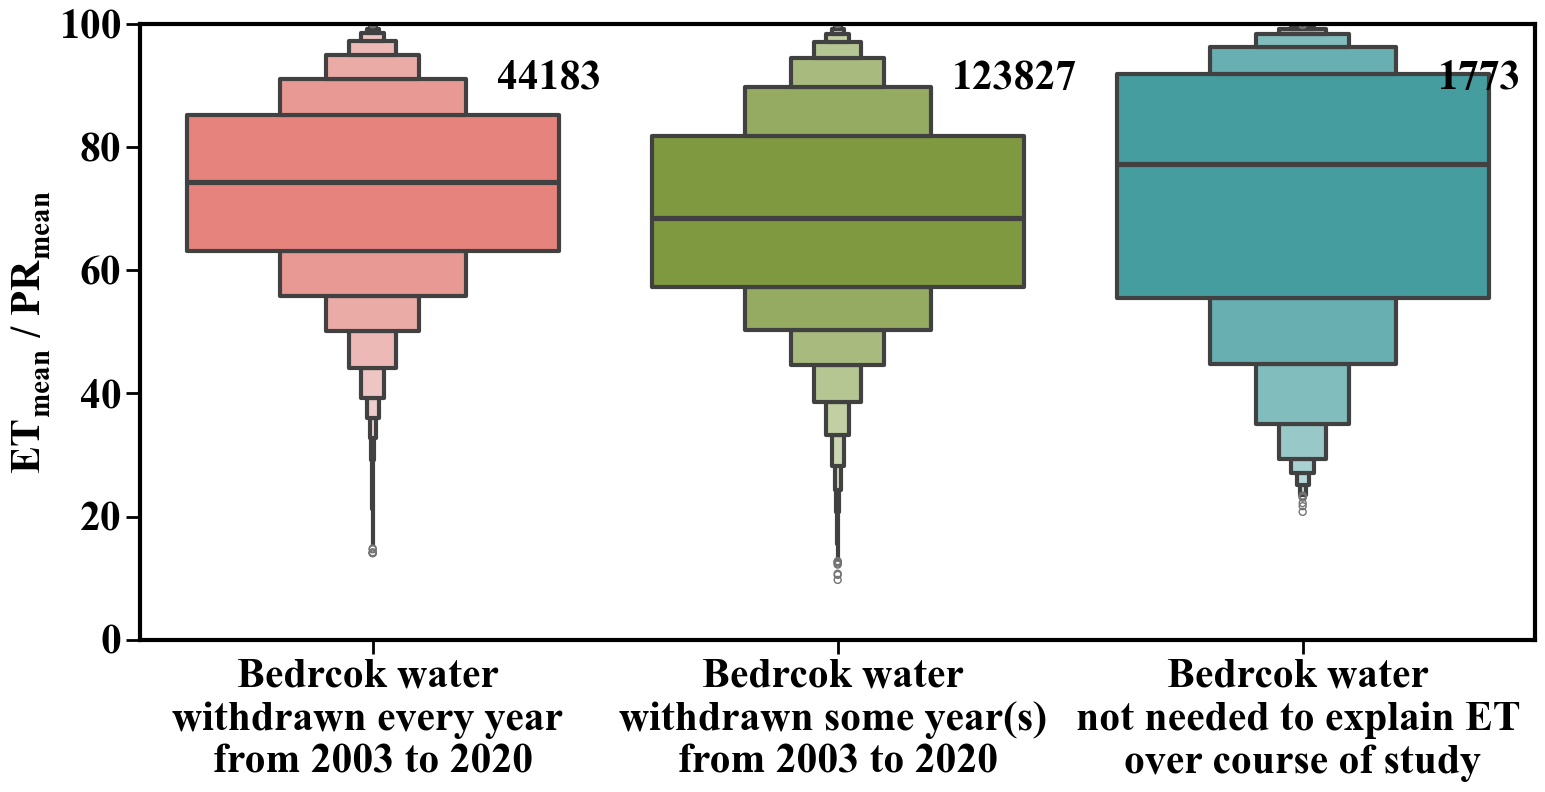

In [33]:
fig = plt.figure(figsize=(18, 8))
sns.boxenplot(x="Dbedrock_Frequency", y="P/ET_mean_div_PR_mean", data=df, linewidth=3,
              hue='Dbedrock_Frequency',palette=sns.husl_palette(4, s=0.90, l=0.65, h=0.0417))
                
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(3)  

for i, label in enumerate(ax.get_xticklabels()):
    x_pos = label.get_position()[0]
    ax.text(x_pos+0.38, 88, f'{n[i]}', ha='center', va='bottom', fontsize=size1, fontweight='bold', color='black')

plt.ylim(0, 100)


plt.xlabel('')  
plt.ylabel("$ET_{mean}$ / $PR_{mean}$", fontsize=size1, fontweight='bold')  

current_ticks = [0,1,2]

new_labels = ['Bedrcok water \nwithdrawn every year \nfrom 2003 to 2020', 
                        'Bedrcok water \nwithdrawn some year(s) \nfrom 2003 to 2020', 
                        'Bedrcok water \nnot needed to explain ET \nover course of study']

plt.xticks(ticks=current_ticks, labels=new_labels, fontsize=size1, fontweight='bold')

yticks =np.linspace(0,100,6).astype('int64')
plt.yticks(ticks=yticks,labels=yticks,fontsize=size1, fontweight='bold')

/tmp/ipykernel_3217072/461334942.py:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.


([<matplotlib.axis.YTick at 0x147803fa39d0>,
 [Text(0, 0, '0'),
  Text(0, 20, '20'),
  Text(0, 40, '40'),
  Text(0, 60, '60'),
  Text(0, 80, '80'),
  Text(0, 100, '100')])

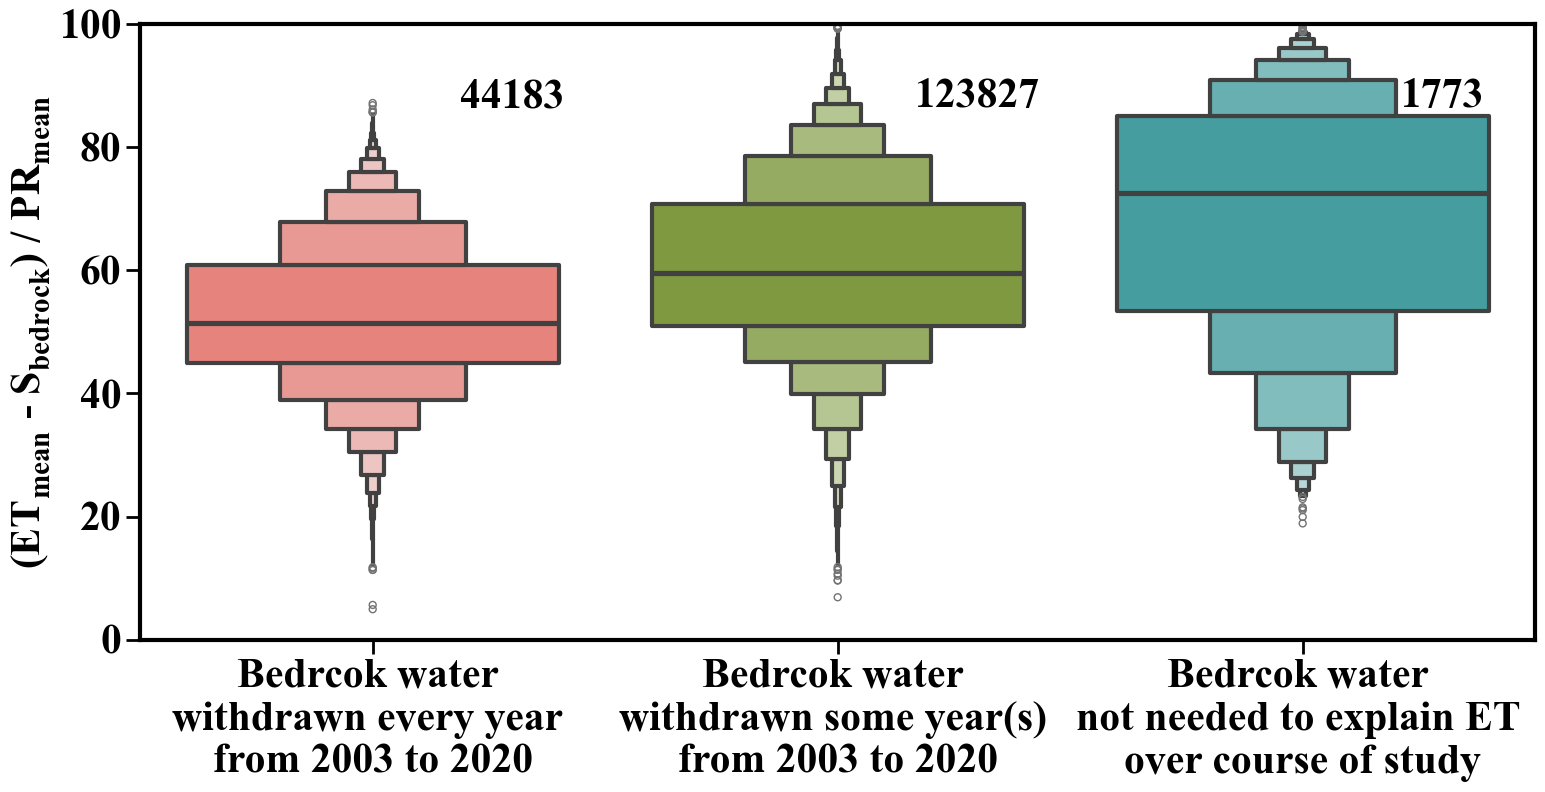

In [34]:
fig = plt.figure(figsize=(18, 8))
sns.boxenplot(x="Dbedrock_Frequency", y="P/ET_mean_sub_Sbedrock_div_PR_mean", data=df, linewidth=3,
              hue='Dbedrock_Frequency',palette=sns.husl_palette(4, s=0.90, l=0.65, h=0.0417))
                
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(3)  

for i, label in enumerate(ax.get_xticklabels()):
    x_pos = label.get_position()[0]
    ax.text(x_pos+0.3, 85, f'{n[i]}', ha='center', va='bottom', fontsize=size1, fontweight='bold', color='black')

plt.ylim(0, 100)


plt.xlabel('')  
plt.ylabel("($ET_{mean}$ - $S_{bedrock}$) / $PR_{mean}$", fontsize=size1, fontweight='bold')  

current_ticks = [0,1,2]

new_labels = ['Bedrcok water \nwithdrawn every year \nfrom 2003 to 2020', 
                        'Bedrcok water \nwithdrawn some year(s) \nfrom 2003 to 2020', 
                        'Bedrcok water \nnot needed to explain ET \nover course of study']

plt.xticks(ticks=current_ticks, labels=new_labels, fontsize=size1, fontweight='bold')

yticks =np.linspace(0,100,6).astype('int64')
plt.yticks(ticks=yticks,labels=yticks,fontsize=size1, fontweight='bold')

/tmp/ipykernel_3217072/2699447323.py:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.


([<matplotlib.axis.YTick at 0x14780804ff10>,
 [Text(0, 0, '0'),
  Text(0, 20, '20'),
  Text(0, 40, '40'),
  Text(0, 60, '60'),
  Text(0, 80, '80'),
  Text(0, 100, '100')])

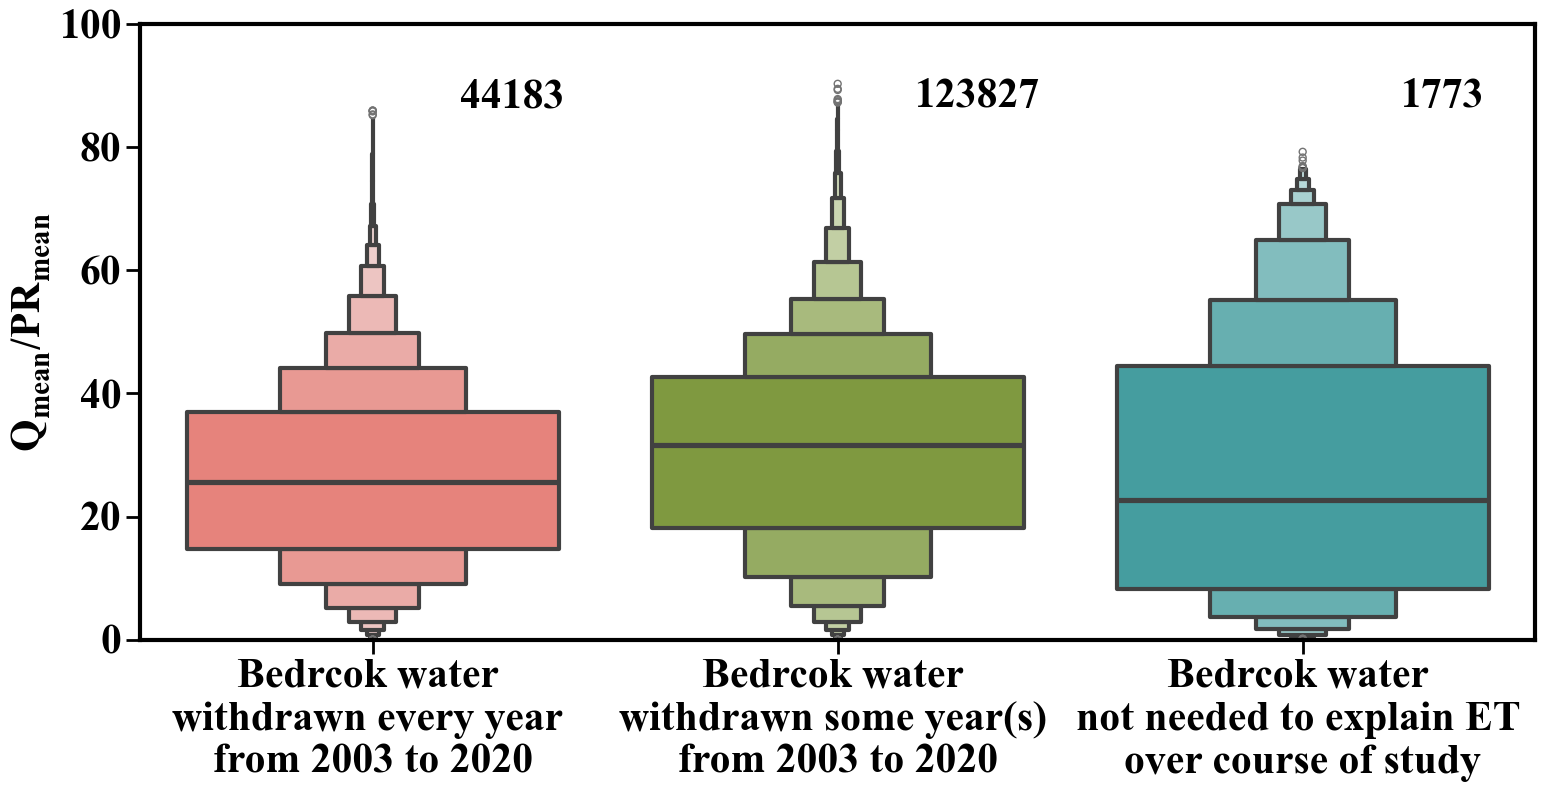

In [35]:
fig = plt.figure(figsize=(18, 8))
sns.boxenplot(x="Dbedrock_Frequency", y="P/Q_mean_div_PR_mean", data=df, linewidth=3,
              hue='Dbedrock_Frequency',palette=sns.husl_palette(4, s=0.90, l=0.65, h=0.0417))
                
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(3)  

for i, label in enumerate(ax.get_xticklabels()):
    x_pos = label.get_position()[0]
    ax.text(x_pos+0.3, 85, f'{n[i]}', ha='center', va='bottom', fontsize=size1, fontweight='bold', color='black')

plt.ylim(0, 100)


plt.xlabel('')  
plt.ylabel("$Q_{mean}$/$PR_{mean}$", fontsize=size1, fontweight='bold')  

current_ticks = [0,1,2]

new_labels = ['Bedrcok water \nwithdrawn every year \nfrom 2003 to 2020', 
                        'Bedrcok water \nwithdrawn some year(s) \nfrom 2003 to 2020', 
                        'Bedrcok water \nnot needed to explain ET \nover course of study']

plt.xticks(ticks=current_ticks, labels=new_labels, fontsize=size1, fontweight='bold')

yticks =np.linspace(0,100,6).astype('int64')
plt.yticks(ticks=yticks,labels=yticks,fontsize=size1, fontweight='bold')

/tmp/ipykernel_3217072/3665674029.py:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.


([<matplotlib.axis.YTick at 0x147803e2ad10>,
 [Text(0, 0, '0'),
  Text(0, 20, '20'),
  Text(0, 40, '40'),
  Text(0, 60, '60'),
  Text(0, 80, '80'),
  Text(0, 100, '100')])

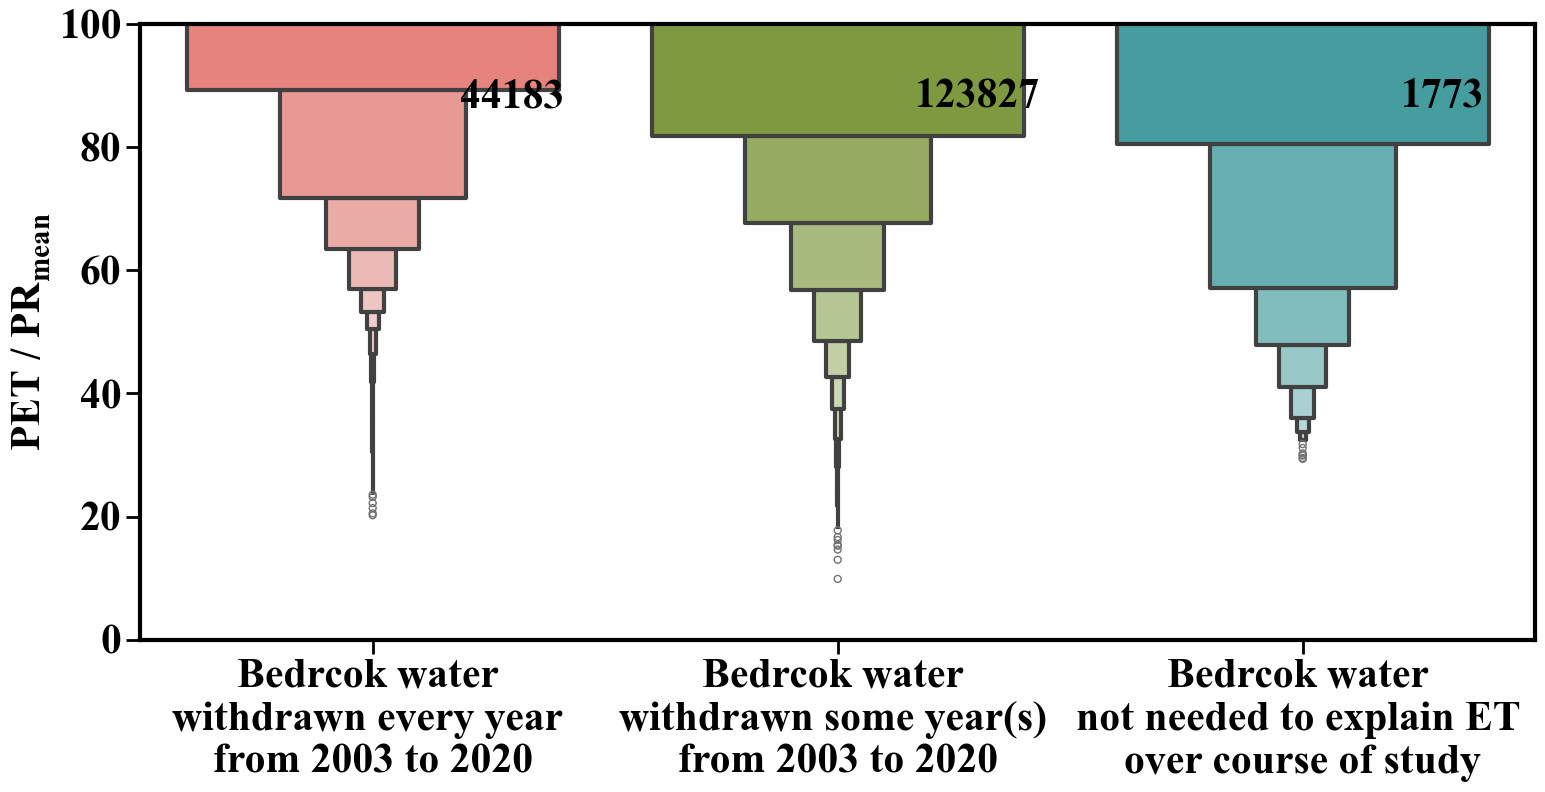

In [37]:
fig = plt.figure(figsize=(18, 8))
sns.boxenplot(x="Dbedrock_Frequency", y="P/PET_div_PR_mean", data=df, linewidth=3,
              hue='Dbedrock_Frequency',palette=sns.husl_palette(4, s=0.90, l=0.65, h=0.0417))
                
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(3)  

for i, label in enumerate(ax.get_xticklabels()):
    x_pos = label.get_position()[0]
    ax.text(x_pos+0.3, 85, f'{n[i]}', ha='center', va='bottom', fontsize=size1, fontweight='bold', color='black')

plt.ylim(0, 100)


plt.xlabel('')  
plt.ylabel("PET / $PR_{mean}$", fontsize=size1, fontweight='bold')  

current_ticks = [0,1,2]

new_labels = ['Bedrcok water \nwithdrawn every year \nfrom 2003 to 2020', 
                        'Bedrcok water \nwithdrawn some year(s) \nfrom 2003 to 2020', 
                        'Bedrcok water \nnot needed to explain ET \nover course of study']

plt.xticks(ticks=current_ticks, labels=new_labels, fontsize=size1, fontweight='bold')

yticks =np.linspace(0,100,6).astype('int64')
plt.yticks(ticks=yticks,labels=yticks,fontsize=size1, fontweight='bold')